In [1]:
from Agents.AlphaBetaAgent import AlphaBetaAgent

In [2]:
from pettingzoo.classic import connect_four_v3
from Run.run_N_episodes import run_N_episodes
from Agents.RandomAgent import RandomAgent
from Agents.QLearnerAgent import QLearner
from Run.run_episode import run_episode

from Run.test_agent import test_agent
import numpy
from Agents.YourAgent import YourAgent

from tqdm import tqdm

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
env = connect_four_v3.env(render_mode='rgb_array')
env.reset()

In [4]:
possible_action = {0,1,2,3,4,5,6}
agent = QLearner(possible_action, 
                env.observation_space, 
                gamma=0.99, 
                lr=0.1,
                eps_init=.5, 
                eps_min=1e-5,
                eps_step=1-3,
                name='Q-learning')
agents = [agent,AlphaBetaAgent(possible_action, env.observation_space)]
run_N_episodes(env, agents, N_episodes=1000)

  0%|          | 0/1000 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [13]:
agents = [RandomAgent(env,possible_action,env.observation_space),AlphaBetaAgent(possible_action, env.observation_space)]
agents = [AlphaBetaAgent(possible_action, env.observation_space),YourAgent()]


In [19]:
len(agent.q_values)

823

In [6]:
from Run.test_agent import test_agent

In [10]:
test = test_agent(env, agents, 100)

100%|██████████| 100/100 [08:40<00:00,  5.20s/it]

{'player_0': 0, 'player_1': 100, 'equal': 0}


In [11]:
test[0]

{'player_0': 0, 'player_1': 100, 'equal': 0}

In [14]:
from Run.run_episode import run_episode

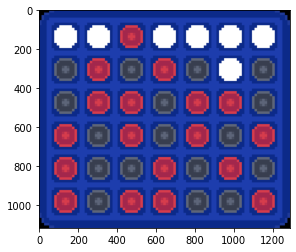

ValueError: invalid literal for int() with base 10: ' '

In [25]:
env = connect_four_v3.env(render_mode='rgb_array')
env.reset()
run_episode(env,agents, True)

In [17]:
def clean_q_values(agent):
    to_delete = list()
    for qval in tqdm(agent.q_values):
        if numpy.all(agent.q_values[qval] == numpy.zeros(7)):
            to_delete.append(qval)
    for to_del in to_delete:
        del agent.q_values[to_del] 

In [18]:
clean_q_values(agent)

100%|██████████| 6989/6989 [00:00<00:00, 112761.73it/s]
